# COGS 108 - The Effect of COVID-19 in Our Oceans

# Overview

With the growing prominence of climate change and the beginning of the pandemic, we wanted to analyze the influence of COVID-19 preventative measures on the amount of pollution found in the United States' oceans, more specifically Personal Protective Equipment (PPE). After looking through past work regarding ocean waste, including National Oceanic and Atmospheric Administration (NOAA), we found a dataset from TIDES, or Trash Information and Data for Educaiton and Solutions. Using this data, we cleaned it of its few missing variables and constructed some features to determine the potential correlation between amounts of and rates of PPE collected over time; with a t-test, we found that the rates of PPE collected before and after the start of COVID-19 were not signfiicantly different. After analyzing the relationship between the variables, we used some of these features to construct a predictor model, calculating the potential amounts of PPE based off of past trends. 

# Names

- Sikandar Bangash
- Ian Jeffers
- Mary Mei Longano
- Rachel Ung

<a id='research_question'></a>
# Research Question

How has COVID-19 preventative measures affected the amounts of and rates of PPE pollution collected on the coastlines of the United States over time?

<a id='background'></a>

## Background & Prior Work

Plastic pollution has been on the rise for years, and has impacted the ecosystems in our oceans drastically. While these pollutants may be only one of many factors impacting our environment, plastic pollution is one of the most impactful issues. From sea turtles choking on plastic straws to microplastics showing up in major human organs, plastic pollution seems to permeate our lives in ways we never would have imagined. Nowadays, in the era of the coronavirus pandemic, masks and Personal Protective Equipment (PPE) are normalized and encouraged, which is leaving its mark in the form of plastic PPE pollution. Using historical data from the last few years, we hope to analyze this trend to further understand how our ecosystems have and will be affected by human plastic consumption and waste.

The National Centers for Environmental Information, National Oceanic and Atmospheric Administration (NOAA) is a source for environmental data and has specifically recorded trends occuring in the oceans due to plastic consumption. Their site features data regarding sea surface salinity and temperature, microplastics, pCO2, and chlorophyll collected from Turn the Tide on Plastic and AkzoNobel and meteorological data. Additionally, they feature data including ocean currents and estimates the plastics in locations using currents and identifies it by plastic subtype and pollutant type. Another source of information was the Coastal Cleanup Project, which is a volunteer-driven waste-cleanup and waste-tracking organization, who has been operating and collecting pollution and litter data since 2015. 

On March 11, 2020, the World Health Organization officially declared COVID-19 to be a pandemic. We want to investigate if the implementation of COVID-19 preventative measures has any correlation with the amount of Personal Protective Equipment (PPE) found in our oceans.

References (include links):
- 1) https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.nodc:0170967
- 2) https://hub.arcgis.com/datasets/9975c79018ac43ea88ddb64ff92e5375?geometry=-143.690%2C-88.949%2C-32.176%2C63.454
- 3) https://www.ajmc.com/view/a-timeline-of-covid19-developments-in-2020

# Hypothesis


We believe that there will be an increase in PPE pollution (measured as frequency and PPE collected per volunteer) in the ocean as time progresses from the start of the COVID-19 pandemic.

(prompted by the drastic increase in both the supply and demand of PPE in accordance with local policy and regulation)

# Dataset(s)

This dataset comes form TIDES, or Trash Information and Data for Educaiton and Solutions. We are focused on the United States of America specifically, and we intend to use the waste data, including weight and volume of trash cleaned, to understand the distribution of trash in our oceans.

- Dataset Name: [Data] Trash Information and Data for Education and Solutions
- Link to the dataset: https://www.coastalcleanupdata.org/reports#
- Number of observations: 20,086

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('DetailedSummary-UnitedStates.csv', low_memory=False)
df.head()

,Cleanup ID,Zone,State,Country,GPS,Cleanup Type,Cleanup Date,Group Name,Adults,Children,...,Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Personal Hygiene (Clean Swell),Gloves & Masks (PPE),Foam Pieces,Glass Pieces,Plastic Pieces,Total Items Collected
0,75961,"Monroe County, MI, USA","Michigan, USA",United States,"41.93515, -83.39225","Land (beach, shoreline and inland)",2020-06-22,NaN,1.0,0.0,...,0,0,0,0,0,0,0,0,0,11.0
1,94571,NaN,NaN,United States,"28.635674604683, -83.133995150659","Land (beach, shoreline and inland)",2020-09-19,Citrus County Aquatic Services,130.0,121.0,...,7,3,1,12,0,0,283,179,192,6445.0
2,102671,"Harris County, TX, USA","Texas, USA",United States,"29.70636, -95.54475","Land (beach, shoreline and inland)",2020-12-24,Kinsey-Lloyd,2.0,0.0,...,0,0,0,0,0,0,0,0,250,262.0
3,102672,"Harris County, TX, USA","Texas, USA",United States,"29.70636, -95.54475","Land (beach, shoreline and inland)",2020-12-24,Kinsey-Lloyd,2.0,0.0,...,0,0,0,0,2,0,0,0,1251,1302.0
4,102682,"Harris County, TX, USA","Texas, USA",United States,"29.70636, -95.54475","Land (beach, shoreline and inland)",2020-12-24,Kinsey-Lloyd,2.0,0.0,...,0,0,0,0,0,0,0,0,250,262.0


# Data Cleaning

First, we will look at the features in this dataset, we can see there is the Cleanup ID, Zone, State, Country, GPS, etc.

In [3]:
df.columns

Index(['Cleanup ID', 'Zone', 'State', 'Country', 'GPS', 'Cleanup Type',
       'Cleanup Date', 'Group Name', 'Adults', 'Children', 'People', 'Pounds',
       'Miles', '# of bags', 'Cigarette Butts',
       'Food Wrappers (candy, chips, etc.)',
       'Take Out/Away Containers (Plastic)', 'Take Out/Away Containers (Foam)',
       'Bottle Caps (Plastic)', 'Bottle Caps (Metal)', 'Lids (Plastic)',
       'Straws, Stirrers', 'Forks, Knives, Spoons',
       'Beverage Bottles (Plastic)', 'Beverage Bottles (Glass)',
       'Beverage Cans', 'Grocery Bags (Plastic)', 'Other Plastic Bags',
       'Paper Bags', 'Cups, Plates (Paper)', 'Cups, Plates (Plastic)',
       'Cups, Plates (Foam)', 'Fishing Buoys, Pots & Traps',
       'Fishing Net & Pieces', 'Fishing Line (1 yard/meter = 1 piece)',
       'Rope (1 yard/meter = 1 piece)', 'Fishing Gear (Clean Swell)',
       '6-Pack Holders', 'Other Plastic/Foam Packaging',
       'Other Plastic Bottles (oil, bleach, etc.)', 'Strapping Bands',
       'Toba

Upon further investigation, we can see that many of the variables are in the int or float representations with a few as objects or strings. Manually looking at the dataset, it makes sense that a majority of the variables are integers, as many of the values are frequency of a type of pollution e.g. '# of bags' or 'Cigarette Butts'. 

In [4]:
df.dtypes.value_counts()

int64      50
object      8
float64     7
dtype: int64

## Data Missingness

First, we will investigate the null values, looking at the number of null values in each observation, or cleanup, and those in the dataset's features.

In [5]:
null_rows = df[df.isnull().any(axis=1)]
null_rows.shape

(5195, 65)

In [6]:
null_cols = df.columns[df.isnull().any()]
null_cols

Index(['Zone', 'State', 'Country', 'GPS', 'Cleanup Type', 'Cleanup Date',
       'Group Name', 'Adults', 'Children', 'People', 'Pounds', 'Miles',
       '# of bags', 'Total Items Collected'],
      dtype='object')

In [7]:
df[null_cols].isnull().sum()

Zone                        9
State                       9
Country                     1
GPS                         1
Cleanup Type                1
Cleanup Date                1
Group Name               5191
Adults                      1
Children                    1
People                      1
Pounds                      1
Miles                       1
# of bags                   1
Total Items Collected       1
dtype: int64

Here, there are 14 of the features that have at least one missing value, 'Group Name' having the most missing values. With 'Group Name', we do not believe this will be incredibly relevant to our posed question. Because there are very few missing values in the other columns, we will simply drop the missing values for simplicity. 

In [8]:
# dropping unnecessary columns: 
df = df.drop(labels=['Group Name'], axis=1)
df.shape

(20086, 64)

In [9]:
# very little missing data, so we will drop the columns with missing values
missingdata = df.isna().sum()
missingdata.head()

df = df.dropna(axis=0).reset_index(drop=True)
df.describe()

,Adults,Children,People,Pounds,Miles,# of bags,Cigarette Butts,"Food Wrappers (candy, chips, etc.)",Take Out/Away Containers (Plastic),Take Out/Away Containers (Foam),...,Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Personal Hygiene (Clean Swell),Gloves & Masks (PPE),Foam Pieces,Glass Pieces,Plastic Pieces,Total Items Collected
count,20077.000000,20077.00000,20077.000000,20077.000000,20077.000000,20077.000000,20077.000000,20077.000000,20077.000000,20077.000000,...,20077.000000,20077.000000,20077.000000,20077.000000,20077.000000,20077.000000,20077.000000,20077.000000,20077.000000,20077.000000
mean,3.964188,0.32480,4.288987,92.701432,1.131988,2.962245,24.857349,12.143846,2.606415,1.433132,...,0.030831,0.034816,0.023260,0.053743,1.589580,1.386711,2.377198,1.065697,24.542511,136.390995
std,24.691491,5.90085,26.834194,2395.710077,28.682063,85.160284,112.109586,40.088129,9.629162,8.264842,...,0.706681,1.238951,0.630157,1.095486,6.507602,4.352584,27.900640,14.642186,107.281323,382.904062
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.00000,1.000000,1.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.00000,1.000000,5.170000,0.051200,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,39.000000
75%,2.000000,0.00000,2.000000,15.000000,0.629800,0.000000,14.000000,11.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,16.000000,146.000000
max,1773.000000,539.00000,1773.000000,216000.000000,2790.017300,9760.000000,5385.000000,2000.000000,400.000000,500.000000,...,54.000000,150.000000,42.000000,96.000000,400.000000,164.000000,1355.000000,981.000000,5238.000000,22765.000000


## Features

Here, we have constructed a feature that determines if the cleanup occurred before or on/after the start of COVID-19 (March 11, 2020).

In [10]:
df['After_Covid'] = df['Cleanup Date'].apply(lambda x: x >= '2020-03-11')

We will convert the 'Cleanup Date' feature to a datetime object. This representation will be useful for our analysis.

In [11]:
df['Cleanup Date'] = df['Cleanup Date'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d'))
df['Cleanup Date'].dtype

dtype('<M8[ns]')

# Data Analysis & Results

## 'Cleanup Type'

First, we are looking at the type of Cleanup with the feature 'Cleanup Type'. 

In [12]:
df['Cleanup Type'].unique()

array(['Land (beach, shoreline and inland)', 'Underwater',
       'Watercraft (powerboat, sailboat, kayak or canoe)'], dtype=object)

With this feature, we can see that a majority of the cleanups occurred on land rather than on water. 

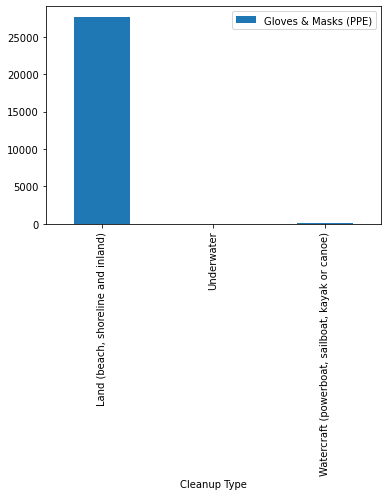

In [13]:
ax = pd.DataFrame(df.groupby('Cleanup Type')['Gloves & Masks (PPE)'].agg(sum)).plot.bar();

## 'Gloves & Masks (PPE)'

In [14]:
df.describe()['Gloves & Masks (PPE)']

count    20077.000000
mean         1.386711
std          4.352584
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        164.000000
Name: Gloves & Masks (PPE), dtype: float64

With the statistics from the describe feature, we the distributions of the features; focusing on the 'Gloves & Masks (PPE)' features specifically, we can see the general distribution of the points. With the average being 2.772180 and the max being 27841.000000, we would like to investigate this further.

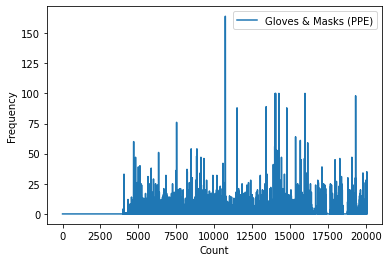

In [15]:
ax = df[['Gloves & Masks (PPE)']].plot();

ax.set_xlabel('Count');
ax.set_ylabel('Frequency');

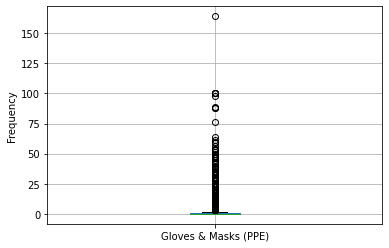

In [16]:
ax = df[['Gloves & Masks (PPE)']].boxplot();
ax.set_ylabel('Frequency');

From these plots of the feature, we can see that there is one distinguishable outlier.

Text(0, 0.5, 'Frequency')

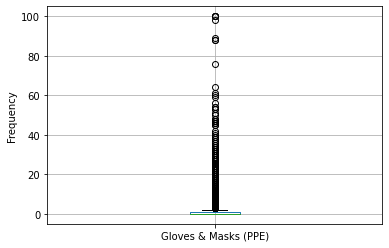

In [17]:
ax = df[df['Gloves & Masks (PPE)'] < 150][['Gloves & Masks (PPE)']].boxplot();
ax.set_ylabel('Frequency')

With the omission of the Cleanup with a PPE count of 27841, we have produced another box and whisker plot. While there are still notable outliers, we have a clearer view of the distribution (right or positively skewed) and can see that while the median = 0 and the mean = 2.772180, there are still points that are greater than 0 or 1 in the overall distribution.

Text(0, 0.5, 'Frequency')

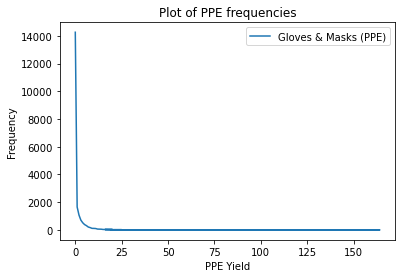

In [18]:
ax = pd.DataFrame(df['Gloves & Masks (PPE)'].value_counts()).plot(title='Plot of PPE frequencies');
ax.set_xlabel('PPE Yield')
ax.set_ylabel('Frequency')

This plot describes the amount of times the frequency of PPE has occurred e.g. How many times did a cleanup yield 0 amounts of PPE. From this plot, we can gather that most Cleanups yielded 0, or no PPE in the collection. This is logical and in accordance with the median = 0.

## Further Refinement

Here, we will be focusing on these features, including the ones constructed:

- **'Cleanup Date':** 
    - the date of the cleanup 
    - datetime object
    - ordinal
- **'People'**
    - number of people at the cleanup
    - float
    - discrete nominal
- **'Gloves & Masks (PPE)':** 
    - frequency of PPE in the cleanup 
    - integer
    - discrete nominal
- **'State':** 
    - the state where the cleanup was held 
    - object or string
    - categorical
- **'PPE_People'**
    - The rate of PPE collected per person
    - float
    - nominal
- **'After_Covid'**
    - states whether the cleanup occurred on/after the start of COVID-19
    - boolean

In [19]:
df['PPE_People'] = df['Gloves & Masks (PPE)']/df['People']
features = ['Cleanup Date', 'People', 'Gloves & Masks (PPE)', 'PPE_People', 'State', 'After_Covid']
data = df[features]
data.head()

,Cleanup Date,People,Gloves & Masks (PPE),PPE_People,State,After_Covid
0,2020-06-22,1.0,0,0.0,"Michigan, USA",True
1,2020-12-24,2.0,0,0.0,"Texas, USA",True
2,2020-12-24,2.0,0,0.0,"Texas, USA",True
3,2020-12-24,2.0,0,0.0,"Texas, USA",True
4,2020-12-27,1.0,0,0.0,"Washington, USA",True


In [20]:
data.describe()

,People,Gloves & Masks (PPE),PPE_People
count,20077.000000,20077.000000,20018.0
mean,4.288987,1.386711,inf
std,26.834194,4.352584,NaN
min,0.000000,0.000000,0.0
25%,1.000000,0.000000,0.0
50%,1.000000,0.000000,0.0
75%,2.000000,1.000000,0.5
max,1773.000000,164.000000,inf


In [21]:
data.dtypes

Cleanup Date            datetime64[ns]
People                         float64
Gloves & Masks (PPE)             int64
PPE_People                     float64
State                           object
After_Covid                       bool
dtype: object

From these statistics, we can see that the average amount of PPE found was ~1.5 and the median was 0: this indicates that while there is PPE, it doesn't seem to constitute a lot of the clean ups. However, we will investigate this phenomenon further.

In [22]:
data['Gloves & Masks (PPE)'].sum()

27841

## PPE vs. Time

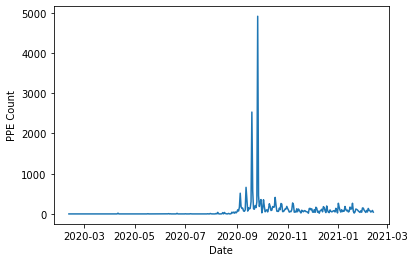

In [23]:
# Plot for PPE Count as Time progresses
plt.xlabel('Date')
plt.ylabel('PPE Count')
plt.plot(data.groupby('Cleanup Date')['Gloves & Masks (PPE)'].apply(sum));

## People vs. Time

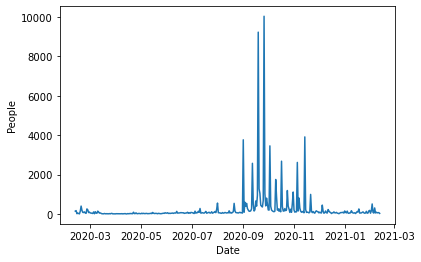

In [24]:
# Plot for People as Time progresses
plt.xlabel('Date')
plt.ylabel('People')
plt.plot(data.groupby('Cleanup Date')['People'].apply(sum));

## PPE/people vs. Time

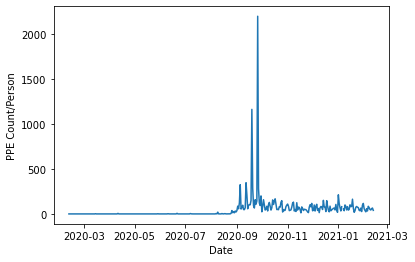

In [25]:
# Plot for PPE Count/Person as Time progresses
plt.xlabel('Date')
plt.ylabel('PPE Count/Person')
plt.plot(data.groupby('Cleanup Date')['PPE_People'].apply(sum));

## Plots vs. Time

From the three plots above, we can see there is an increase in the amount of PPE collected from cleanups. From the second plot, we can see that as time progressed, there are more collectors participating. While it is logical for more PPE to be collected with more volunteers, we can see that the rate of PPE collected per person also increases, similar to the original PPE count per Cleanup. As such, we have reason to believe that there has been an increase in PPE.

## Before and After the Start of COVID-19

We will look at the data from before COVID-19 and on/after COVID-19 to gain a better understanding of the dataset and the relationships within it.

In [26]:
before = data.loc[data['After_Covid'] == False]
after = data.loc[data['After_Covid']]

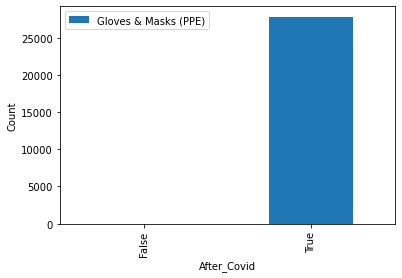

In [27]:
# Plot to compare the masks from before COVID-19 and after
ax = pd.DataFrame(data.groupby('After_Covid')['Gloves & Masks (PPE)'].agg(sum)).plot.bar();
ax.set_ylabel('Count');

This plot indicates that there is a possible correlation between COVID-19 and PPE waste.

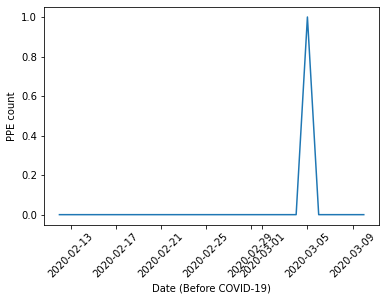

In [28]:
plt.xlabel('Date (Before COVID-19)')
plt.xticks(rotation = 45)
plt.ylabel('PPE count')
plt.plot(before.groupby('Cleanup Date')['Gloves & Masks (PPE)'].apply(sum));

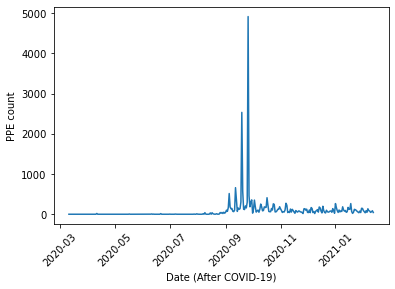

In [29]:
plt.xlabel('Date (After COVID-19)')
plt.xticks(rotation = 45)
plt.ylabel('PPE count')
plt.plot(after.groupby('Cleanup Date')['Gloves & Masks (PPE)'].apply(sum));

By refining the granularity to before and after the declaration of the COVID-19 pandemic, we are able to see the general trends that were occuring in these specified time periods. For instance, we can see that generally, there were no PPE collected, with only an occurence of one item. Compared to the second plot post-COVID-19, we can see that there are several more spikes, one even going farther than 4,000. As such, it is very possible that the COVID-19 measures could be related to the trends of PPE counts.

## t-test

Here, we have conducted a t-test, with the significance level = 0.01, to compare the distribution of points before and after the start of COVID-19; however, because of the limitations of the size of our dataset (especially of the points prior), we will take this into consideration when evaluating results.

In [30]:
before['PPE_People'].shape

(468,)

In [31]:
after['PPE_People'].shape

(19609,)

In [32]:
t_val = ttest_ind(before['PPE_People'], after['PPE_People']).statistic
p_val = ttest_ind(before['PPE_People'], after['PPE_People']).pvalue

assert t_val
assert p_val

if p_val < 0.01: print('We can reject the null hypothesis and potentially consider our alternative hypothesis.')
else: print('There is no significant difference, and we cannot reject the null hypothesis.')

There is no significant difference, and we cannot reject the null hypothesis.


This test determined that there is no significant difference between the distribution of rates of PPE collected before and after the start of the COVID-19 pandemic.

## By State

In [33]:
# We have grouped the data by States, and we noticed that many masks were found on coasts.
by_state = data.groupby('State')[['Gloves & Masks (PPE)', 'PPE_People']].agg(sum)
top_10 = by_state.sort_values(by='Gloves & Masks (PPE)', ascending=False).iloc[:10]
top_10

,Gloves & Masks (PPE),PPE_People
State,,
"California, USA",16833,inf
"Florida, USA",4020,2052.613427
"New York, USA",1350,999.575880
"Connecticut, USA",643,317.159524
"Massachusetts, USA",571,294.492861
"Virginia, USA",552,264.401348
"North Carolina, USA",429,157.141098
"Ohio, USA",405,158.975914
"Texas, USA",397,183.887731


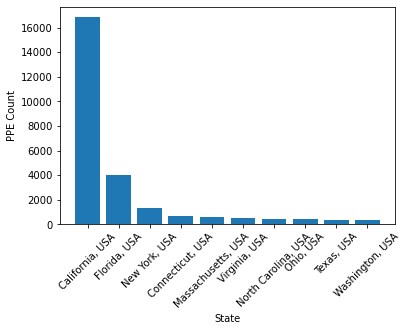

In [34]:
# Bar plot of PPE Count from each of the top 10 US states
plt.xlabel('State')
plt.xticks(rotation = 45)
plt.ylabel('PPE Count')
plt.bar(top_10.index, top_10['Gloves & Masks (PPE)']);

# Prediction

We would like to construct a prediction model to better understand the trends between the amount of PPE in our oceans and COVID-19 regulations. For our model, we will be incorporating all the features into a Logistic Regression model. 

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Constructing the Predictor

Here, we have conducted a predictor function that takes an input of the predictor features, the prediction value, and the model of choice (defaulting to Logistic Regression). It first uses sklearn's train_test_split to construct a set of three training/validation/test data sets each 50%/25%/25% respectfully. This is one measure to prevent overfitting. Next, it fits the training set to the model of choice, then predicting on the validation and test data sets. The function will print and output the calculated accuracies.

In [36]:
def predictor(X, y, mod=LogisticRegression()):
    '''Constructs a predictor (default: Logistic Regression) 
    and outputs the accuracies on validation and test sets
    as print statements'''
    
    # first, split to make test sets
    X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.25)
    
    # split remaining into training and validation sets
    X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, test_size=0.50)

    # train a logistic regression model and fit to training set
    model = mod.fit(X_train, y_train)

    # predict with validation and test set
    valid_preds = mod.predict(X_valid) 
    test_preds = mod.predict(X_test) 

    # calculate accuracy
    valid_acc = accuracy_score(valid_preds, y_valid)
    test_acc = accuracy_score(test_preds, y_test)

    print('validation accuracy: ' + str(valid_acc))
    print('test accuracy: ' + str(test_acc))

    return valid_acc, test_acc

## Choosing the Features

These features were chosen based off of our previous EDA.

In [37]:
predictor_vals = data[['Cleanup Date', 'People', 'State', 'After_Covid']]
predictor_vals.head()

,Cleanup Date,People,State,After_Covid
0,2020-06-22,1.0,"Michigan, USA",True
1,2020-12-24,2.0,"Texas, USA",True
2,2020-12-24,2.0,"Texas, USA",True
3,2020-12-24,2.0,"Texas, USA",True
4,2020-12-27,1.0,"Washington, USA",True


In [38]:
predictor_vals.shape

(20077, 4)

The 'Cleanup Date' is an ordinal feature, so we will transform this feature with the Ordinal Encoder from sklearn. Evidently, the 'State' feature consists of the names of United States states, which is a categorical feature represented as a string. Before feeding this feature into our predictor, we will also one hot encode it using sklearn's preprocessing method.

In [39]:
dates = OrdinalEncoder().fit_transform(predictor_vals[['Cleanup Date']])
states = OneHotEncoder().fit_transform(predictor_vals[['State']]).toarray()

We will set our predictor value to be the 'Gloves & Masks (PPE)' feature.

In [40]:
y = data['Gloves & Masks (PPE)']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Gloves & Masks (PPE), dtype: int64

## Predicting with the Models

First, we tried out a model with only the ordinal encoded 'Cleanup Date', and found that the accuracy on the test set was at about

In [41]:
# dates only
dates_valid, dates_test = predictor(dates, y)

validation accuracy: 0.71682826404569
test accuracy: 0.7127490039840637


In [42]:
# states only
states_valid, states_test = predictor(states, y)

validation accuracy: 0.7158985257006243
test accuracy: 0.7119521912350597


In [43]:
# (number of) people only
people_valid, people_test = predictor(predictor_vals[['People']], y)

validation accuracy: 0.7054057643777394
test accuracy: 0.7145418326693227


In [44]:
# (if occurred) after covid only 
covid_valid, covid_test = predictor(predictor_vals[['After_Covid']], y)

validation accuracy: 0.714570328064816
test accuracy: 0.7121513944223108


In [45]:
X = pd.DataFrame(states) # one hot encoded 'State'
X['Date'] = pd.DataFrame(dates)[0] # ordinal encoded 'Cleanup Dates'
X['People'] = predictor_vals['People'] # 'People'
X['After_Covid'] = predictor_vals['After_Covid'] # 'After_Covid'
X.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,Date,People,After_Covid
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0,1.0,True
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,316.0,2.0,True
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,316.0,2.0,True
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,316.0,2.0,True
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,319.0,1.0,True


In [46]:
all_valid, all_test = predictor(X, y)

validation accuracy: 0.7088590782308407
test accuracy: 0.7183266932270916


## Results 

After calulating the validation and test accuracies of the features, we have produced the following results. There is not much variation between the accuracies, and we believe this may be attributed to the smaller size of our dataset, especially considering that it mostly encompasses the period of COVID-19 and focuses on only the US specifically. With more hyperparameter tuning, potentially another dataset, and other models, we believe this predictor could be further optimized.

In [47]:
results = pd.DataFrame({'Date': [dates_valid, dates_test], 'State':[states_valid, states_test], 
            'People': [people_valid, people_test], 'After_Covid': [covid_valid, covid_test], 
             'All': [all_valid, all_test], 'Accuracy': ['validation', 'test']}).set_index('Accuracy')
results

,Date,State,People,After_Covid,All
Accuracy,,,,,
validation,0.716828,0.715899,0.705406,0.714570,0.708859
test,0.712749,0.711952,0.714542,0.712151,0.718327


# Ethics & Privacy

   Platform availability is a big concern as well for organizations or researchers who have worked hard to collect accurate plastic pollutant data, but experience limitations when it comes to sharing the data with the world. Additionally, data may not be compiled equitably around the world considering how certain oceanic locations differ from others.
   
   Since our primary source of pollutant data was the Coastal Cleanup Project, one potential issue is how developed and accessible a region’s coastline is (for instance, California and Florida both have very accessible coastlines). Also, there are drastically more coastlines in oceanic regions than those limited to lakes or rivers. Socioeconomic factors may limit parts of the population from participating in volunteer events, so data reporting may be restricted in certain regions. However, we implement a control by looking for PPE collected per capita at volunteer events we are able to find trends.
   
   Additionally, our dataset is contained within February 20, 2020 to February 20, 2021-- the amount of data prior to COVID-19 is significantly less than that during/after the pandemic. This study focused on data from the United States, so this data may not hold true for other countries with different levels of wealth, education, resources, and cultures. For instance, in areas that are notoriously polluted, there may be more resources already allocated to coastal cleanup unrelated to The Coastal Cleanup Project. We will note these biases throughout our project and appropriately discuss their potential impacts on our visualizations and results. 
   
   
   

# Conclusion & Discussion

   With our plots, we tried to understand how the COVID-19 pandemic could be correlated to the amount of Preventative Protection Equipment (PPE) waste found in our oceans. Using our dataset, we considered: the cleanup date, amount of people participating in the cleanup, amount of PPE collected, amount of PPE collected per person, the state the cleanup was located, and whether the cleanup occurred before or after the COVID-19 pandemic. When evaluating our results, we will also take into consideration that our dataset spans one year, 02-20-20 to 02-20-21. As such, there will be fewer data to analyze the trends prior to COVID-19. Additionally, the PPE feature consists of both Gloves and Masks and includes data only on the United States. With each of these factors, we were able to gain a better idea about this relationship. 

   Plotting the _PPE counts per Cleanup Date_ immediately displayed a large spike in PPE counts. Additionally, we plotted the amount of people participating _('People') per Cleanup Date_; this plot did show an increase in number of volunteers, which could be a confounding factor as to why there was more PPE collected. However, when plotting the _amount of PPE collected per person_, we could see that this plot mirrored the original _PPE counts per Cleanup Date_: this exemplifies how the rise in PPE could be attributed to something else other than number of volunteers, potentially the COVID-19 regulations. Next, we refined our granularity to before and after the declaration of COVID-19, which was March 11, 2020 (03/11/21). We performed a t-test on these sets, finding that the p-value was less than our set significance level of 0.01, so they were not in fact significantly different and we cannot reject the null hypothesis; this was to be expected given our dataset sizes (468 vs. 19609). When observing the cleanups per U.S. state, we can see that there was more PPE collected in states near coastlines, which makes sense logically. From this refinement, we can see that the states with the most PPE accumulated were California, Florida, New York, Connecticut, and Massachusetts. We believe this ordering also makes sense, because these states are both near coasts and densely populated.

   For our prediction task, we focused on predicting the amount of PPE, 'Gloves & Masks (PPE)' collected given the features 'Cleanup Date', 'People', 'State', and 'After_Covid'. We defined a function to first split the data into training/validation/test datasets and to fit and predict with a Logistic Regression model. We found that given each of the features individually and on all the features together, the validation and test accuracies amounted to about 70%-71%. We believe that these results are fair given the limitations on the size of our dataset. If we were to further refine our model (_more data_, data engineering, hypertuning, other models), we believe that this predictor would be beneficial in forecasting how our environment will appear in the years to come. Additionally, this project will bring to light how COVID-19 has affected our communities beyond the people it infects and will bring greater awareness to climate change.


# Team Contributions

- Sikandar Bangash
- Ian Jeffers
- Mary Mei Longano
- Rachel Ung: Overview, Data Cleaning, Data Analysis & Results, Prediction, Discussion & Conclusion